In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [5]:
df=pd.read_csv('/content/drive/MyDrive/WOC_6.0/KNN/Classification_train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
a = df.shape[0]
a -= 5000
x_train=np.array(df.iloc[0:a,1:] , dtype = np.int32)
y_train=np.array(df.iloc[0:a,0:1] , dtype = np.int16)
x_val=np.array(df.iloc[a:,1:] , dtype = np.int32)
y_val=np.array(df.iloc[a:,0:1] , dtype = np.int16)
x_train.shape,y_train.shape

((25000, 784), (25000, 1))

In [7]:
y_val = y_val.reshape(-1)

In [8]:
y_val.shape

(5000,)

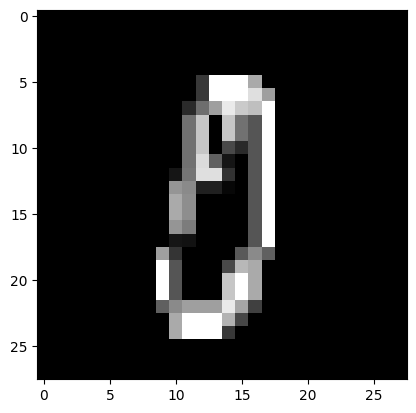

In [9]:
plt.imshow(x_train[0].reshape(28,28),cmap="gray")

In [10]:
class KNN:
  def __init__(self, X, Y, max_k, optimal_num=80):
    self.X_train = X
    self.Y_train = Y
    self.optimal_num = optimal_num
    self.best_k = self.best_k_function(max_k)

  def best_k_function(self, max_k):
    accuracy_history = []
    for K in range(2 , max_k+1):
      x_train = self.X_train[:5000]
      x_test = self.X_train[5000:6000]
      output = np.array([], dtype = np.int16)
      for i in range(1000//self.optimal_num):
        output = np.append(output , self.distance_calculator(x_test[i*self.optimal_num: (i+1)*self.optimal_num],K))
      remainder = 1000 % self.optimal_num
      if remainder !=0 :
        output = np.append(output , self.distance_calculator(x_test[-remainder:],K))
      accuracy = np.mean(np.where((output == self.Y_train[5000:6000].reshape(-1)),1,0))
      accuracy_history.append(accuracy)
      if accuracy == max(accuracy_history):
        best_k = K
    self.plot_accuracy(accuracy_history, max_k)
    return K

  def plot_accuracy(self , accuracy_history, max_k):
    plt.plot(np.arange(2, max_k+1), accuracy_history)
    plt.title("Accuracy vs K")
    plt.ylabel("Accuracy")
    plt.xlabel("K")

  def queue(self, X_test,K):
    #80 is without crash
    test_samples_nos= X_test.shape[0]
    output = np.array([], dtype = np.int16)
    for i in range(test_samples_nos//self.optimal_num):
      output = np.append(output , self.distance_calculator(X_test[i*self.optimal_num: (i+1)*self.optimal_num],K))
    remainder = test_samples_nos % self.optimal_num
    if remainder !=0 :
      output = np.append(output , self.distance_calculator(X_test[-remainder:],K))
    '''
    if size of Y_test = optimal_num then array get repeated so use if else to rectify it
    '''
    return output


  def distance_calculator(self, X_test,K):
    a,b = X_test.shape
    c = self.X_train.shape[0]
    X_test = X_test.reshape(a,1,b)
    X_test = X_test.repeat(c, axis=1)
    distance = np.sum((X_test - self.X_train)**2 , axis=2, dtype = np.int32)
    top_k = np.argsort(distance)[:,:K]
    output = self.Y_train[top_k]
    E,F = top_k.shape
    output = np.apply_along_axis(self.predictor, 1 , output).reshape(-1).astype(np.int16)
    return output

  def predictor(self,a):
    return np.argmax(np.bincount(a))

  def accuracy(self, X_test,Y_test):
    K = self.best_k
    T1 = time.time()
    Y_pred = self.queue(X_test, K)
    accuracy = np.mean(np.where((Y_pred == Y_test),1,0))
    print("accuracy: ", accuracy)
    print("Time taken: ", time.time()-T1)

  def evaluate(self, X_test, K):
    return self.queue(X_test , K)

  def Plot_image(i,X):
    print(plt.imshow(X[i].reshape(28,28),cmap="gray"))

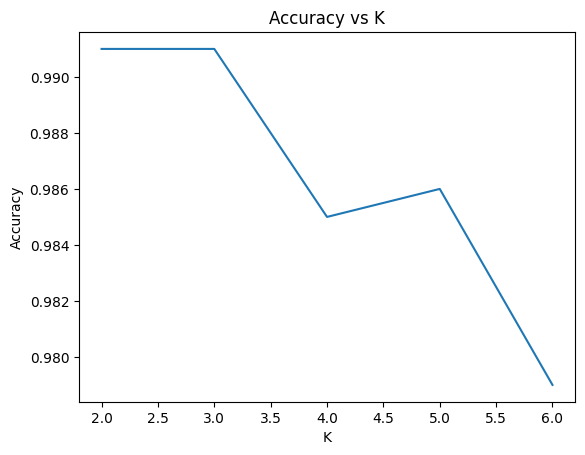

In [11]:
model = KNN(x_train , y_train , max_k = 6 , optimal_num = 30)

In [12]:
model.accuracy(x_val,y_val)

accuracy:  0.9772
Time taken:  538.9146556854248


In [15]:
df1=pd.read_csv('/content/drive/MyDrive/WOC_6.0/KNN/Classification_test.csv')
df1

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,15795,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11964,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,18563,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,634,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,10057,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
x_test=np.array(df1.iloc[:,1:] , dtype = np.int32)
id = np.array(df1.iloc[:,0] , dtype = int)
x_test.shape , id.shape

((10000, 784), (10000,))

In [17]:
y_pred = model.evaluate(x_test, 3)

In [18]:
y_pred.shape

(10000,)

In [19]:
submission = pd.DataFrame({"Id":id , "Output":y_pred})
submission

,Id,Output
0,15795,0
1,860,4
2,5390,5
3,11964,5
4,11284,9
...,...,...
9995,11260,9
9996,18563,9
9997,634,0
9998,10057,8


In [20]:
submission.to_csv("/content/drive/MyDrive/WOC_6.0/KNN/Submission_KNN.csv")